In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/extended_data (1).csv')
df

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [3]:
df.columns

Index(['model_year', 'brand', 'model', 'type', 'miles_per_gallon',
       'premium_version', 'msrp', 'collection_car'],
      dtype='object')

In [4]:
df.shape

(28143, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_year        28143 non-null  int64  
 1   brand             28143 non-null  object 
 2   model             28143 non-null  object 
 3   type              28143 non-null  object 
 4   miles_per_gallon  28126 non-null  float64
 5   premium_version   28143 non-null  int64  
 6   msrp              28126 non-null  float64
 7   collection_car    28143 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ MB


In [6]:
df[df.duplicated()]

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car


In [7]:
df.isnull().sum()

,0
model_year,0
brand,0
model,0
type,0
miles_per_gallon,17
premium_version,0
msrp,17
collection_car,0


In [8]:
df

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [9]:
df['miles_per_gallon'].mean()

21.769241982507285

In [10]:
df['miles_per_gallon']=df['miles_per_gallon'].fillna(df['miles_per_gallon'].mean())

In [11]:
df.isnull().sum()

,0
model_year,0
brand,0
model,0
type,0
miles_per_gallon,0
premium_version,0
msrp,17
collection_car,0


In [12]:
df['msrp']=df['msrp'].fillna(df['msrp'].mean())

In [13]:
df.isnull().sum()

,0
model_year,0
brand,0
model,0
type,0
miles_per_gallon,0
premium_version,0
msrp,0
collection_car,0


In [14]:
#CAT_NUM
cat=[]
num=[]
for i in df.columns:
  if df[i].nunique()<=100:
    cat.append(i)
  else:
    num.append(i)

In [15]:
cat

['model_year', 'brand', 'type', 'premium_version', 'collection_car']

In [16]:
num

['model', 'miles_per_gallon', 'msrp']

In [17]:
df = df.drop('model', axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_year        28143 non-null  int64  
 1   brand             28143 non-null  object 
 2   type              28143 non-null  object 
 3   miles_per_gallon  28143 non-null  float64
 4   premium_version   28143 non-null  int64  
 5   msrp              28143 non-null  float64
 6   collection_car    28143 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [19]:
df.brand.unique()

array(['Toyota', 'RAM', 'Ford', 'BMW', 'Mercedes-Benz', 'Lexus',
       'Chevrolet', 'Audi', 'Porsche', 'Genesis', 'Hummer', 'Mazda',
       'Land', 'Honda', 'Jeep', 'Jaguar', 'Lincoln', 'Nissan', 'Saturn',
       'Cadillac', 'Kia', 'Maserati', 'Volkswagen', 'Dodge', 'Subaru',
       'Chrysler', 'Hyundai', 'Mitsubishi', 'INFINITI', 'Tesla',
       'Lamborghini', 'GMC', 'MINI', 'Acura', 'Buick', 'Rivian',
       'Pontiac', 'Alfa', 'Mercury', 'Volvo', 'Rolls-Royce', 'McLaren',
       'Bentley', 'Aston', 'FIAT', 'Scion', 'Ferrari', 'Lucid', 'Saab',
       'Maybach', 'Karma', 'Suzuki', 'Lotus', 'Bugatti', 'Plymouth',
       'smart', 'Polestar'], dtype=object)

In [20]:

from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe= OneHotEncoder(sparse_output= False)
brands=ohe.fit_transform(df[['brand']])#only acceptb df
brands

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
type(brands)

numpy.ndarray

In [23]:
ohe.categories_

[array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
        'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object)]

In [24]:
brand_df=pd.DataFrame(brands,columns=ohe.categories_)
brand_df

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df=pd.concat([df,brand_df] ,axis=1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Acura,)","(Alfa,)","(Aston,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df['type'].nunique()

9

In [27]:
df['type'].unique()

array(['SUV', 'Van', 'Coupe', 'Sedan', 'Convertible', 'Pickup', 'Minivan',
       'Hatchback', 'Wagon'], dtype=object)

In [28]:
ohe= OneHotEncoder(sparse_output= False)
types=ohe.fit_transform(df[['type']])#only acceptb df
types


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [29]:
type(types)

numpy.ndarray

In [30]:
ohe.categories_

[array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'SUV',
        'Sedan', 'Van', 'Wagon'], dtype=object)]

In [31]:
type_df=pd.DataFrame(types,columns=ohe.categories_)
type_df

,Convertible,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
28138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
df=pd.concat([df,type_df] ,axis=1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Acura,)","(Alfa,)","(Aston,)",...,"(smart,)","(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
df['type'].nunique()

9

In [34]:
df['type'].unique()

array(['SUV', 'Van', 'Coupe', 'Sedan', 'Convertible', 'Pickup', 'Minivan',
       'Hatchback', 'Wagon'], dtype=object)

In [35]:
x_df=df.drop(columns=['type','brand','msrp']) #Independent
y_df=df['msrp'] #Dependent data
x_df

,model_year,miles_per_gallon,premium_version,collection_car,"(Acura,)","(Alfa,)","(Aston,)","(Audi,)","(BMW,)","(Bentley,)",...,"(smart,)","(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,13.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,15.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,16.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,27.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,18.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,21.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,18.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,94.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,20.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
x=x_df.values
y=y_df.values

In [37]:
x

array([[2.016e+03, 1.300e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.014e+03, 1.500e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.002e+03, 1.600e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.018e+03, 9.400e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.022e+03, 2.000e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.020e+03, 2.200e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [38]:
y

array([ 84900.,  35000.,  26250., ..., 199000.,  63700.,  83500.])

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22514, 70)
(5629, 70)
(22514,)
(5629,)


In [41]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_train_pred=lr_model.predict(x_train)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
mse_t=mean_squared_error(y_train_pred,y_train)
rmse_t=mean_squared_error(y_train_pred,y_train)**0.5
mae_t=mean_absolute_error(y_train_pred,y_train)
print(mse_t)
print(rmse_t)
print(mae_t)

999762680.4345032
31619.02402722929
16372.916109576638


In [45]:
y_test_pred=lr_model.predict(x_test)
mse_test=mean_squared_error(y_test_pred,y_test)
rmse_test=mean_squared_error(y_test_pred,y_test)**0.5
mae_test=mean_absolute_error(y_test_pred,y_test)
print(mse_test)
print(rmse_test)
print(mae_test)

1849191679.9813368
43002.22877923116
16998.999664306477


In [46]:
x

array([[2.016e+03, 1.300e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.014e+03, 1.500e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.002e+03, 1.600e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.018e+03, 9.400e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.022e+03, 2.000e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.020e+03, 2.200e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [47]:
x_df

,model_year,miles_per_gallon,premium_version,collection_car,"(Acura,)","(Alfa,)","(Aston,)","(Audi,)","(BMW,)","(Bentley,)",...,"(smart,)","(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,13.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,15.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,16.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,27.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,18.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,21.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,18.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,94.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,20.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
# assumptions of linear regresion
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, probplot

def test_linear_regression_assumptions(X, y, X_df):
    """
    Tests the key assumptions of linear regression: linearity, independence, homoscedasticity, normality,
    and no multicollinearity.

    Parameters:
    X_df (DataFrame): Independent variables
    y (Series): Dependent variable

    Returns:
    None
    """
    # Add constant to X for intercept
    X = sm.add_constant(X)

    # Fit the OLS model
    ols_model = sm.OLS(y, X).fit()
    residuals = ols_model.resid
    predicted_values = ols_model.fittedvalues


    # 1. Linearity
    print("1. Linearity:\n")
    plt.scatter(predicted_values, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.show()
    print("Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.\n")

    # 2. No Autocorrelation: Independence of Errors
    print("2. Independence of Errors (Durbin-Watson Test):\n")
    dw_stat = durbin_watson(residuals)
    print(f"Durbin-Watson statistic: {dw_stat}")
    if 1.5 <= dw_stat <= 2.5:
        print("Residuals appear to be independent (No autocorrelation).\n")
    else:
        print("Residuals show autocorrelation. Consider adding lag variables or using GLS.\n")

    # 3. Homoscedasticity
    print("3. Homoscedasticity (Breusch-Pagan Test):\n")
    bp_test = het_breuschpagan(residuals, X)
    print(f"Lagrange Multiplier Statistic: {bp_test[0]}")
    print(f"p-value: {bp_test[1]}")
    if bp_test[1] > 0.05:
        print("Residuals have constant variance (Homoscedasticity).\n")
    else:
        print("Residuals do not have constant variance (Heteroscedasticity). Consider GLS or transformations.\n")

    # 4. Normality of Errors
    print("4. Normality of Errors:\n")
    sns.histplot(residuals, kde=True, bins=20, color='blue')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    if shapiro_test.pvalue > 0.05:
        print("Residuals are normally distributed.\n")
    else:
        print("Residuals are not normally distributed. Consider transformations or robust regression.\n")


    # 5. Multicollinearity
    print("5. Multicollinearity (Variance Inflation Factor):\n")
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    print(vif_data)
    if vif_data["VIF"].max() > 10:
        print("High multicollinearity detected. Consider removing or combining highly correlated variables.\n")
    else:
        print("No significant multicollinearity detected.\n")

1. Linearity:



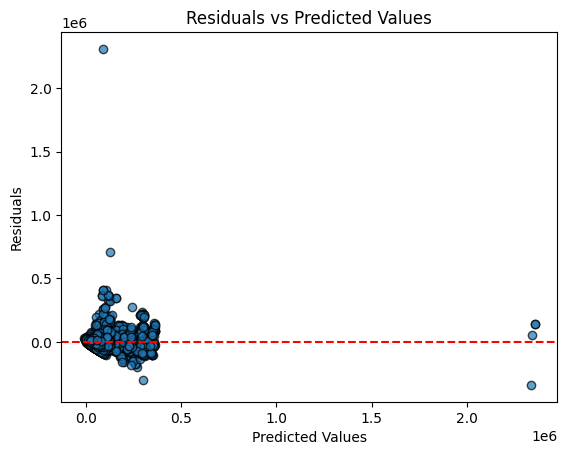

Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.

2. Independence of Errors (Durbin-Watson Test):

Durbin-Watson statistic: 1.9871561429522584
Residuals appear to be independent (No autocorrelation).

3. Homoscedasticity (Breusch-Pagan Test):

Lagrange Multiplier Statistic: 129.56309839209186
p-value: 1.9697330785576893e-05
Residuals do not have constant variance (Heteroscedasticity). Consider GLS or transformations.

4. Normality of Errors:



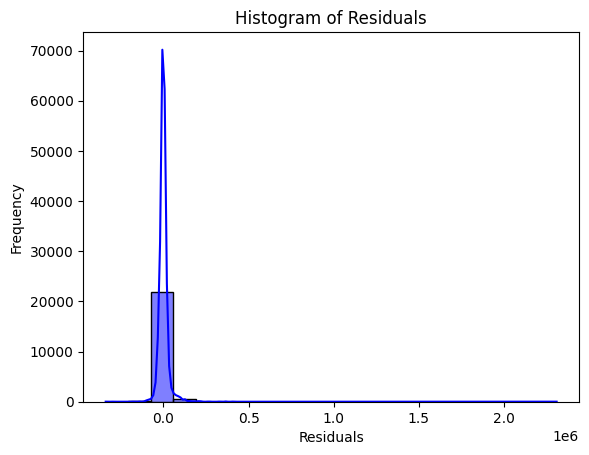

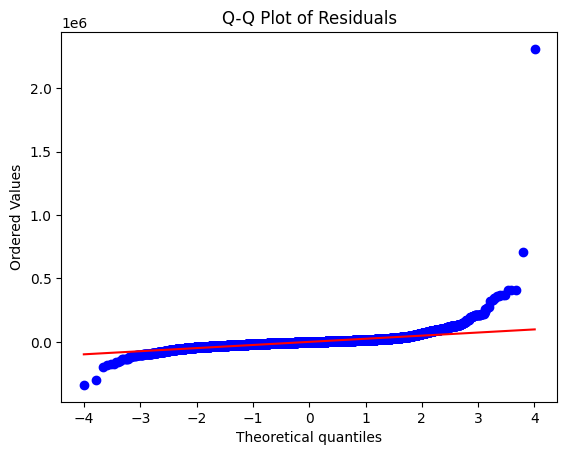

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22514.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-value: 2.826596660798654e-113
Residuals are not normally distributed. Consider transformations or robust regression.

5. Multicollinearity (Variance Inflation Factor):



/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Feature       VIF
0         model_year  1.187395
1   miles_per_gallon  1.690856
2    premium_version  1.321688
3     collection_car  1.530893
4           (Acura,)       inf
..               ...       ...
65         (Pickup,)       inf
66            (SUV,)       inf
67          (Sedan,)       inf
68            (Van,)       inf
69          (Wagon,)       inf

[70 rows x 2 columns]
High multicollinearity detected. Consider removing or combining highly correlated variables.



In [49]:
test_linear_regression_assumptions(x_train, y_train, x_df)

In [50]:
#POLYNOMIAL RERGETION

from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly= PolynomialFeatures(degree= 2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test= poly.transform(x_test)


In [52]:
x_train[0].size

70

In [53]:
x_poly_train[0].size

2556

In [54]:
poly_model= LinearRegression()
poly_model.fit(x_poly_train, y_train)
y_poly_pred= poly_model.predict(x_poly_train)
y_poly_pred

array([28596.36888625, 29185.63101222, 48420.5038271 , ...,
       27914.95477267, 30549.95389203, 54473.38145572])

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_poly_train=mean_squared_error(y_poly_pred, y_train)
rmse_poly_train=mean_squared_error(y_poly_pred, y_train)**0.5
mae_poly_train=mean_absolute_error(y_poly_pred, y_train)
r2_poly_train= r2_score(y_poly_pred, y_train)
print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_poly_train)

999762680.4345032
31619.02402722929
16372.916109576638
0.7580231662339985


In [56]:
y_poly_test_pred= poly_model.predict(x_poly_test)
mse_test=mean_squared_error(y_poly_test_pred, y_test)
rmse_test=mean_squared_error(y_poly_pred, y_train)**0.5
mae_test=mean_absolute_error(y_poly_test_pred, y_test)
r2_poly_train= r2_score(y_poly_test_pred, y_test)

print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_poly_train)

1848153243.3296301
27288.571560960154
14648.646288113645
0.11907861397771347


In [57]:
# Regularization : Lasso or L1 (It reduce the importance of features and adds an error)
# Lasso = Cost Function + Lambda * (bi**2)
# Linear Regularization y = b0 + b1x1 + b2x2 + b3x3

from sklearn.linear_model import Lasso, Ridge, ElasticNet

l1 = Lasso(alpha= 1.0)
l1.fit(x_train, y_train)
y_pred_train_l1= l1.predict(x_train)

mse_l1_train =mean_squared_error(y_pred_train_l1, y_train)
rmse_l1_train =mean_squared_error(y_pred_train_l1, y_train)**0.5
mae_l1_train =mean_absolute_error(y_pred_train_l1, y_train)
r2_l1_train =r2_score(y_train,y_pred_train_l1)
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

999817533.7743629
31619.89142572066
16376.906719443567
0.7384110241035409


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.011e+10, tolerance: 8.605e+09
  model = cd_fast.enet_coordinate_descent(


In [58]:
#lasso

y_pred_test_l1=l1.predict(x_test)

mse_l1_test=mean_squared_error(y_pred_test_l1,y_test)
rmse_l1_test=mean_squared_error(y_pred_test_l1,y_test)**0.5
mae_l1_test=mean_absolute_error(y_test,y_pred_test_l1)
r2_l1_test=r2_score(y_test,y_pred_test_l1)
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

1849287248.1436098
43003.339964979576
16998.50728367964
0.48454081633506574


In [59]:
# Ridge = Cost Function + Lambda * (bi)
# It eliminates the least important of features.
from sklearn.linear_model import Lasso, Ridge, ElasticNet

l2 = Ridge(alpha= 1.0)
l2.fit(x_train, y_train)
y_pred_train_l2= l2.predict(x_train)

mse_l2_train =mean_squared_error(y_pred_train_l2, y_train)
rmse_l2_train =mean_squared_error(y_pred_train_l2, y_train)**0.5
mae_l2_train =mean_absolute_error(y_pred_train_l2, y_train)
r2_l2_train =r2_score(y_train,y_pred_train_l2 )
print(mse_l2_train)
print(rmse_l2_train)
print(mae_l2_train)
print(r2_l2_train)

1034640461.9227701
32165.8275491673
16487.79829314688
0.7293000675496288


In [60]:
#Ridge
y_pred_test_l1=l2.predict(x_test)

mse_l1_test=mean_squared_error(y_pred_test_l1,y_test)
rmse_l1_test=mean_squared_error(y_pred_test_l1,y_test)**0.5
mae_l1_test=mean_absolute_error(y_pred_test_l1,y_test)
r2_l1_test=r2_score(y_test,y_pred_test_l1)
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

1850743395.1307118
43020.267260103254
17068.216295625192
0.48413493869868374


In [61]:
# ElasticNet : It is the combination of Lasso and Ridge.
from sklearn.linear_model import Lasso, Ridge, ElasticNet

l3 = ElasticNet(alpha= 1.0, l1_ratio = 0.6)
l3.fit(x_train, y_train)
y_pred_train_l3= l3.predict(x_train)

mse_l3_train =mean_squared_error(y_pred_train_l3, y_train)
rmse_l3_train =mean_squared_error(y_pred_train_l3, y_train)**0.5
mae_l3_train =mean_absolute_error(y_pred_train_l3, y_train)
r2_l3_train =r2_score(y_train,y_pred_train_l3)
print(mse_l3_train)
print(rmse_l3_train)
print(mae_l3_train)
print(r2_l3_train)

3084169310.224832
55535.297876439196
25572.571395572708
0.19306807082353483


In [62]:
#Elastic Net
y_pred_test_l1=l2.predict(x_test)
mse_l1_test=mean_squared_error(y_pred_test_l1,y_test)
rmse_l1_test=mean_squared_error(y_pred_test_l1,y_test)**0.5
mae_l1_test=mean_absolute_error(y_pred_test_l1,y_test)
r2_l1_test=r2_score(y_test,y_pred_test_l1)
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

1850743395.1307118
43020.267260103254
17068.216295625192
0.48413493869868374


In [63]:
#knn regressor fast algo comapre to others
from sklearn.neighbors import KNeighborsRegressor
knn_r=KNeighborsRegressor(n_neighbors=5)
knn_r.fit(x_train,y_train)
y_train_knn=knn_r.predict(x_train)

mse_knn_train=mean_squared_error(y_train_knn,y_train)
rmse_l1_train =mean_squared_error(y_train_knn, y_train)**0.5
mae_knn_train =mean_absolute_error(y_train_knn, y_train)
r2_knn_train =r2_score(y_train,y_train_knn)
print(mse_knn_train)
print(rmse_l1_train)
print(mae_knn_train)
print(r2_knn_train)

851420378.9046409
29179.108603667813
11222.277137075851
0.7772371683318531


In [64]:
#knn regressor
y_test_knn=knn_r.predict(x_test)

mse_knn_test=mean_squared_error(y_test_knn,y_test)
rmse_knn_test=mean_squared_error(y_test_knn,y_test)**0.5
mae_knn_test=mean_absolute_error(y_test_knn,y_test)
r2_knn_test=r2_score(y_test,y_test_knn)
print(mse_knn_test)
print(rmse_knn_test)
print(mae_knn_test)
print(r2_knn_test)

1529032797.8046947
39102.848972992935
14167.165714391072
0.5738066119557685


In [65]:
#SVR(support vector regression) generaaly not used
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_train_svr=svr.predict(x_train)

mse_svr_train=mean_squared_error(y_train_svr,y_train)
rmse_svr_train =mean_squared_error(y_train_svr, y_train)**0.5
mae_svr_train =mean_absolute_error(y_train_svr, y_train)
r2_svr_train =r2_score(y_train,y_train_svr)
print(mse_svr_train)
print(rmse_svr_train)
print(mae_svr_train)
print(r2_svr_train)

4079217461.737855
63868.751841083096
28210.536962625018
-0.06727305956186092


In [66]:
#svr

y_test_svr=svr.predict(x_test)

mse_svr_test=mean_squared_error(y_test_svr,y_test)
rmse_svr_test=mean_squared_error(y_test_svr,y_test)**0.5
mae_svr_test=mean_absolute_error(y_test_svr,y_test)
r2_svr_test=r2_score(y_test,y_test_svr)
print(mse_svr_test)
print(rmse_svr_test)
print(mae_svr_test)
print(r2_svr_test)

3818259290.249323
61792.064945665334
27319.363953605603
-0.06427858557327082


In [67]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20, random_state=0)
dt.fit(x_train,y_train)
y_train_dt=dt.predict(x_train)

mse_dtree_train=mean_squared_error(y_train_dt,y_train)
rmse_dtree_train =mean_squared_error(y_train_dt, y_train)**0.5
mae_dtree_train =mean_absolute_error(y_train_dt, y_train)
r2_dtree_train =r2_score(y_train,y_train_dt)
print(mse_dtree_train)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)

222672040.12275887
14922.199573881822
7681.369400427318
0.9417408187305973


In [69]:
#decision tree regressor

y_test_dt=dt.predict(x_test)

mse_dtree_test=mean_squared_error(y_test_dt,y_test)
rmse_dtree_test=mean_squared_error(y_test_dt,y_test)**0.5
mae_dtree_test=mean_absolute_error(y_test_dt,y_test)
r2_dtree_test=r2_score(y_test,y_test_dt)
print(mse_dtree_test)
print(rmse_dtree_test)
print(mae_dtree_test)
print(r2_dtree_test)

1792011862.8997068
42332.16109413394
13408.76591748252
0.5005054120740746


In [70]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor(max_depth=20,n_estimators=100, random_state=0)
forest.fit(x_train, y_train)
y_train_forest=forest.predict(x_train)


mse_forest_train=mean_squared_error(y_train_forest, y_train)
rmse_forest_train= mean_squared_error(y_train_forest, y_train)**0.5
mae_forest_train=mean_absolute_error(y_train_forest, y_train)
r2_forest_train= r2_score(y_train, y_train_forest)
print(mse_forest_train)
print(rmse_forest_train)
print(mae_forest_train)
print(r2_forest_train)


258206091.7342535
16068.79247903381
8178.696236470972
0.9324438061693028


In [72]:
#random forest regressor

y_test_forest=forest.predict(x_test)

mse_forest_test=mean_squared_error(y_test_forest,y_test)
rmse_forest_test=mean_squared_error(y_test_forest,y_test)**0.5
mae_forest_test=mean_absolute_error(y_test_forest,y_test)
r2_forest_test=r2_score(y_test,y_test_forest)
print(mse_forest_test)
print(rmse_forest_test)
print(mae_forest_test)
print(r2_forest_test)

1511326296.5747118
38875.78033396515
12133.258968469434
0.5787420154084939
